In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
base = pd.read_csv('/Users/alanalins/pisi3/Diabetes-PISI3/KDD/dfCleaned.csv') #alterar
base.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
1,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
2,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
3,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
4,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0


In [2]:
base.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [3]:
#dropando colunas nao normalizadas
# base = base.drop(columns=['GenHlth', 'Age', 'MentHlth',
                     # 'PhysHlth', 'Income', 'Education',
                     # 'BMI', 'Diabetes_012'])
# base.columns

In [4]:
#Separando em X e Y 
X = base.drop('DiffWalk',axis=1)
y = base.DiffWalk

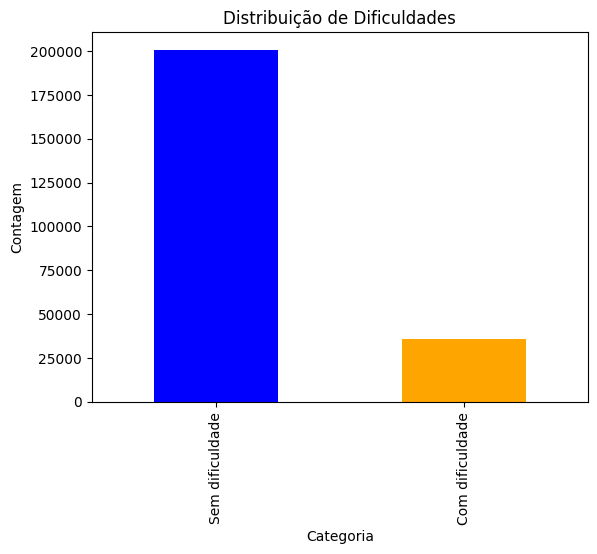

In [5]:


# Supondo que y seja uma série pandas com os valores 0.0 e 1.0
# Exemplo: y = pd.Series([0.0, 1.0, 0.0, 1.0, 1.0, 0.0])

# Substituir valores numéricos por labels
labels = {0.0: "Sem dificuldade", 1.0: "Com dificuldade"}
y_labels = y.replace(labels)

# Contar a frequência dos valores
value_counts = y_labels.value_counts()

# Plotar gráfico de barras
value_counts.plot(kind='bar', color=['blue', 'orange'])

# Adicionar título e labels
plt.title('Distribuição de Dificuldades')
plt.xlabel('Categoria')
plt.ylabel('Contagem')

# Mostrar gráfico
plt.show()

#trocar grafico e semantica
#add labels

In [6]:
y_labels.value_counts()

DiffWalk
Sem dificuldade    200707
Com dificuldade     35777
Name: count, dtype: int64

### Dividindo entre treino e teste

In [7]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split
# Fazendo a separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42,stratify=y)
# Verificando a proporção na base de treino
(y_train.value_counts()/y_train.shape[0])*100

DiffWalk
0.0    84.870995
1.0    15.129005
Name: count, dtype: float64

In [8]:
# Treino
knn = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
knn.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = knn.predict(X_test)

# Avaliando o desempenho do modelo nos dados de teste
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)

Acurácia: 0.86
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92     66234
         1.0       0.57      0.41      0.48     11806

    accuracy                           0.86     78040
   macro avg       0.73      0.68      0.70     78040
weighted avg       0.85      0.86      0.85     78040



In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Testando um modelo Naive Bayes
nb = GaussianNB()
nb.fit(X_test, y_test)
y_pred_nb = nb.predict(X_test)

# Avaliando o desempenho
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"Acurácia (Naive Bayes): {accuracy_nb:.2f}")
print(report_nb)


Acurácia (Naive Bayes): 0.83
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90     66234
         1.0       0.46      0.67      0.55     11806

    accuracy                           0.83     78040
   macro avg       0.70      0.76      0.72     78040
weighted avg       0.86      0.83      0.84     78040



A acurácia em datasets desbalanceados, em geral, é muito alta

Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Testando um modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Avaliando o desempenho
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Acurácia (Random Forest): {accuracy_rf:.2f}")
print(report_rf)


Acurácia (Random Forest): 0.88
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93     66234
         1.0       0.66      0.44      0.53     11806

    accuracy                           0.88     78040
   macro avg       0.78      0.70      0.73     78040
weighted avg       0.87      0.88      0.87     78040



# Balanceado

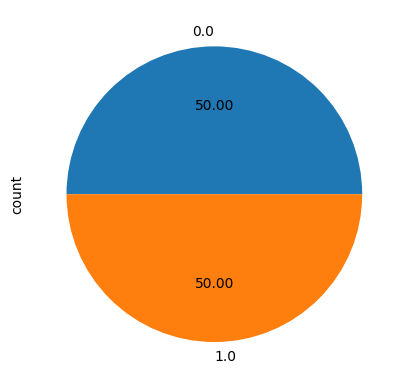

In [11]:
from imblearn.under_sampling import RandomUnderSampler
# Definindo o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
# Aplicando para X e y
X_res, y_res = rus.fit_resample(X_train, y_train)
# Visualizando graficamente
y_res.value_counts().plot.pie(autopct='%.2f');

In [12]:
y_res.value_counts()

DiffWalk
0.0    23971
1.0    23971
Name: count, dtype: int64

In [13]:
# Criando o modelo KNN
knn_balanced = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
knn_balanced.fit(X_res, y_res)

# Fazendo previsões nos dados de teste
y_pred2 = knn_balanced.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2)

print(f"Acurácia knn balanceado: {accuracy:.2f}")
print("Relatório de Classificação balanceado:")
print(report)

Acurácia knn balanceado: 0.82
Relatório de Classificação balanceado:
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89     66234
         1.0       0.43      0.69      0.53     11806

    accuracy                           0.82     78040
   macro avg       0.69      0.76      0.71     78040
weighted avg       0.86      0.82      0.83     78040



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Testando um modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_res, y_res)
y_pred_rf = rf.predict(X_test)

# Avaliando o desempenho
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Acurácia (Random Forest): {accuracy_rf:.2f}")
print(report_rf)


Acurácia (Random Forest): 0.80
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87     66234
         1.0       0.42      0.81      0.55     11806

    accuracy                           0.80     78040
   macro avg       0.69      0.80      0.71     78040
weighted avg       0.88      0.80      0.82     78040



In [15]:
# Testando um modelo Naive Bayes
nb_balanced = GaussianNB()
nb_balanced.fit(X_res, y_res)
y_pred_nb_balanced = nb_balanced.predict(X_test)

# Avaliando o desempenho
accuracy_nb_balanced = accuracy_score(y_test, y_pred_nb_balanced)
report_nby_pred_nb_balanced = classification_report(y_test, y_pred_nb_balanced)

print(f"Acurácia (Naive Bayes): {accuracy_nb_balanced:.2f}")
print(report_nby_pred_nb_balanced)

Acurácia (Naive Bayes): 0.80
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88     66234
         1.0       0.42      0.73      0.53     11806

    accuracy                           0.80     78040
   macro avg       0.68      0.78      0.70     78040
weighted avg       0.87      0.80      0.82     78040

